In [1]:
import numpy as np
import pandas as pd

In [2]:
#Data Analysis............
twitter_train = pd.read_csv('twitter_train.csv')

In [3]:
twitter_test = pd.read_csv('twitter_test.csv')

In [4]:
twitter_train.shape

(10980, 12)

In [5]:
twitter_test.shape

(3660, 11)

In [6]:
twitter_train.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [7]:
twitter_test.head()

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)


In [8]:
twitter_train.isnull().sum()

tweet_id                      0
airline_sentiment             0
airline                       0
airline_sentiment_gold    10949
name                          0
negativereason_gold       10956
retweet_count                 0
text                          0
tweet_coord               10204
tweet_created                 0
tweet_location             3550
user_timezone              3577
dtype: int64

In [9]:
twitter_train.columns

Index(['tweet_id', 'airline_sentiment', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
set(twitter_train['retweet_count'].values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 15, 18, 22, 28, 31, 44}

In [11]:
set(twitter_train['airline_sentiment'].values)

{'negative', 'neutral', 'positive'}

In [12]:
set(twitter_train['airline'].values)

{'American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America'}

In [13]:
ex = []
ex.append([(twitter_train.loc[2,'text'], 'negative')])
ex.append([(twitter_train.loc[2,'text'], 'negative')])
ex[0]
len(ex)

2

In [14]:
##Fetching Text and Sentiments for applying NLP on xtrain
def Fetch_Text_sent(data):
    tweet_text = []
    row = data.shape[0]
    for i in range(row):
        tweet_text.append((data.loc[i,'text'] , data.loc[i,'airline_sentiment']))
    return tweet_text

In [15]:
##Fetching Text and Sentiments for applying NLP on xtest
def Fetch_Text_sent_xtest(data):
    tweet_text = []
    row = data.shape[0]
    for i in range(row):
        tweet_text.append(data.loc[i,'text'])
    return tweet_text

In [16]:
##Checking function Fetch_Text_sent()
sample = twitter_train.iloc[0:5,0:]
xtrain = Fetch_Text_sent(sample)
len(xtrain)

5

In [17]:
nlp_xtrain=[('','')]
nlp_xtrain = Fetch_Text_sent(twitter_train.iloc[0:,0:])
len(nlp_xtrain)

10980

In [18]:
nlp_xtest=[('','')]
nlp_xtest = Fetch_Text_sent_xtest(twitter_test.iloc[0:,0:])
len(nlp_xtest)

3660

In [19]:
from nltk import WordNetLemmatizer as WL
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize as WT
from nltk import pos_tag

In [20]:
###Getting words from train and test data

xtrain_word = []
for text in nlp_xtrain:
    xtrain_word.append([WT(text[0]) , text[1]])

In [21]:
xtest_word = []
for text in nlp_xtest:
    xtest_word.append(WT(text))

In [22]:
xtest_word[0]

['@',
 'AmericanAir',
 'In',
 'car',
 'gng',
 'to',
 'DFW',
 '.',
 'Pulled',
 'over',
 '1hr',
 'ago',
 '-',
 'very',
 'icy',
 'roads',
 '.',
 'On-hold',
 'with',
 'AA',
 'since',
 '1hr',
 '.',
 'Ca',
 "n't",
 'reach',
 'arpt',
 'for',
 'AA2450',
 '.',
 'Wat',
 '2',
 'do',
 '?']

In [23]:
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')
punc = list(string.punctuation)
stop = stop+punc

In [24]:
def get_simple_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
#Function to remove stop words alphanums , applying lemmatizer
def clean_reviews(word):
    output_words = []
    for w in word:
        if ((w.lower() not in stop) and (w.isalpha())):
            pos = pos_tag([w])
            lemm = WL()
            lem_word = lemm.lemmatize(w,pos = get_simple_tag(pos[0][1]))
            output_words.append(lem_word.lower())
    return output_words

In [26]:
#cleaning train data
clean_data = []
for doc in xtrain_word:
    text = clean_reviews(doc[0])
    if len(text)>0:
        clean_data.append((text,doc[1]))
clean_data[0:5]

[(['southwestair',
   'schedule',
   'morning',
   'day',
   'fact',
   'sure',
   'even',
   'flight',
   'one',
   'cancelled',
   'flightled'],
  'negative'),
 (['southwestair',
   'see',
   'worker',
   'time',
   'time',
   'go',
   'beyond',
   'love',
   'fly',
   'guy',
   'thank'],
  'positive'),
 (['united',
   'flew',
   'ord',
   'miami',
   'back',
   'great',
   'crew',
   'service',
   'leg',
   'thanks'],
  'positive'),
 (['southwestair', 'horse', 'radish'], 'negative'),
 (['united',
   'flight',
   'ord',
   'delayed',
   'air',
   'force',
   'one',
   'last',
   'flight',
   'sbn',
   'min',
   'land'],
  'negative')]

In [27]:
len(clean_data)

10980

In [28]:
#Cleaning Test Data
cleanTest_data = []
for doc in xtest_word:
    cleanTest_data.append(clean_reviews(doc))
cleanTest_data[0:5]

[['americanair',
  'car',
  'gng',
  'dfw',
  'pulled',
  'ago',
  'icy',
  'road',
  'aa',
  'since',
  'ca',
  'reach',
  'arpt',
  'wat'],
 ['americanair',
  'plane',
  'land',
  'identical',
  'bad',
  'condition',
  'grk',
  'accord',
  'metars'],
 ['southwestair',
  'ca',
  'believe',
  'many',
  'pay',
  'customer',
  'left',
  'high',
  'dry',
  'reason',
  'flight',
  'cancelled',
  'flightlations',
  'monday',
  'bdl',
  'wow'],
 ['usairways',
  'legitimately',
  'say',
  'would',
  'rather',
  'driven',
  'cross',
  'country',
  'flown',
  'us',
  'airways'],
 ['americanair', 'still', 'response', 'aa', 'great', 'job', 'guy']]

In [29]:
len(cleanTest_data)

3660

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
categories = [categ for doc,categ in clean_data] 

In [31]:
categories[2]

'positive'

In [32]:
text_docs =  [" ".join(doc) for doc,categ in clean_data] 

In [33]:
test_text_docs = [" ".join(doc) for doc in cleanTest_data] 

In [34]:
test_text_docs[3]

'usairways legitimately say would rather driven cross country flown us airways'

In [35]:
count_vec = CountVectorizer(stop_words = stop,max_features=3000)

In [36]:
x_train = count_vec.fit_transform(text_docs)

In [37]:
x_train.shape

(10980, 3000)

In [38]:
test_text_docs[20]

'southwestair aarp appreciate tweet back unexpected'

In [39]:
x_test = count_vec.transform(test_text_docs)
count_vec.get_feature_names()

['aa',
 'aadvantage',
 'abandon',
 'abc',
 'ability',
 'able',
 'aboard',
 'abq',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'abuse',
 'abysmal',
 'ac',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accidentally',
 'accommodate',
 'accommodation',
 'accomplish',
 'accord',
 'accordingly',
 'account',
 'accountability',
 'acct',
 'accurate',
 'acknowledge',
 'across',
 'act',
 'action',
 'actual',
 'actually',
 'ad',
 'add',
 'additional',
 'address',
 'adds',
 'addtl',
 'admiral',
 'admirals',
 'admit',
 'advance',
 'advantage',
 'advertise',
 'advice',
 'advise',
 'advisory',
 'affect',
 'affected',
 'afford',
 'affordable',
 'afternoon',
 'age',
 'agency',
 'agent',
 'agents',
 'aggressive',
 'ago',
 'agree',
 'agt',
 'ah',
 'ahead',
 'ahhhh',
 'ahold',
 'ai',
 'air',
 'airbus',
 'aircanada',
 'aircraft',
 'airfare',
 'airline',
 'airlinegeeks',
 'airlines',
 'airplane',
 'airport',
 'airway',
 'airways',
 'aisle',
 'alaska',
 'albany',
 'alert',
 'ali',
 'ali

In [40]:
# mat = x_train.todense()

In [41]:
# mat[5000,333]

In [42]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

In [43]:
ytrain = np.reshape(categories, (10980,)).T

In [44]:
################################
###############################
from sklearn.model_selection import train_test_split

xtr , xte , ytr , yte = train_test_split(x_train , ytrain)

In [46]:
xtr.shape

(8235, 3000)

In [47]:
x_train[0:1]

<1x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [48]:
# svmclf = svm.SVC()
# svmclf.fit(x_train,ytrain)
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# from sklearn.neural_network import MLPClassifier
# rfc = MLPClassifier(hidden_layer_sizes=(200,20,10),max_iter=300)
from sklearn.naive_bayes import MultinomialNB
NBC = MultinomialNB()
# from sklearn.tree import ExtraTreeClassifier
# rfc = ExtraTreeClassifier()

In [49]:
NBC.fit(xtr,ytr)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
pred = NBC.predict(xte)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(yte , pred)

0.7621129326047359

In [53]:
x_test.shape

(3660, 3000)

In [59]:
# svmpred = NBC.predict(x_test)
target_names = set(ytr)

In [54]:
from sklearn.metrics import classification_report as cr

In [55]:
print(cr(yte, pred))

              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      1679
     neutral       0.61      0.52      0.56       580
    positive       0.70      0.63      0.67       486

   micro avg       0.76      0.76      0.76      2745
   macro avg       0.71      0.68      0.69      2745
weighted avg       0.75      0.76      0.76      2745



In [61]:
#Confusion matrix........
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

Normalized confusion matrix
[[0.88 0.07 0.04]
 [0.38 0.52 0.09]
 [0.23 0.14 0.63]]


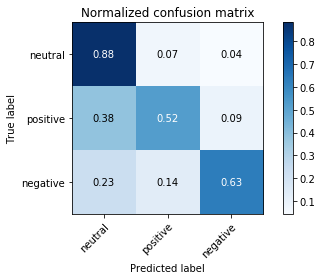

In [66]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(yte, pred, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [ ]:
import csv


with open('output.csv', 'w') as csvFile:
    writer = csv.writer(csvFile,delimiter=",")
    for r in svmpred:
      writer.writerow([r])

In [ ]:
from nltk import NaiveBayesClassifier
